In [21]:
import pandas as pd
import geopandas as gpd
from geopandas import points_from_xy
import matplotlib as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

In [2]:
hoods = gpd.read_file("/Users/hendrixperalta/Desktop/Research Data Manipulation/research_data/adm2/map_files/adm2_shp.shp")

In [3]:
sez = pd.read_csv("/Users/hendrixperalta/Desktop/Research Data Manipulation/research_data/aggregated _data/provinces/sez.csv")

In [4]:
sez.head(5)

,code,name,latitude,longitude,year,close,type,sez_id,origin,inv2000,...,tec2007,tec2008,tec2019,tec2010,tec2011,tec2012,tec2013,tec2014,tec2015,tec2016
0,DOM-6NO,Zona Franca 6 de Noviembre,18.434236,-70.077097,2016.0,0.0,private,1.0,1.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2500.00
1,DOM-ALC,Los Alcarrizos,18.521192,-70.050865,1990.0,0.0,public,2.0,1.0,19853638.95,...,3446.06,2969.16,4073.59,3389.04,3762.00,3197.77,3533.52,3852.34,4420.89,4293.00
2,DOM-ALT,Villa Altagracia,18.687048,-70.180632,1988.0,0.0,private,3.0,1.0,33900000.00,...,3489.29,3026.84,4079.53,2903.04,5212.50,4772.18,4996.25,5007.53,5640.68,5610.00
3,DOM-AND,Andres,18.442336,-69.649780,2009.0,0.0,private,4.0,1.0,0.00,...,0.00,0.00,3514.00,3675.25,3654.00,6025.00,5077.00,7045.37,6936.53,7100.00
4,DOM-ARM,La Armeria,18.421294,-70.117660,1990.0,0.0,public,5.0,1.0,8620740.19,...,1954.00,2551.00,3551.60,3893.25,3359.33,3131.93,4402.00,3956.30,4300.90,4187.17


In [5]:
sez.dtypes

code          object
name          object
latitude     float64
longitude    float64
year         float64
              ...   
tec2012      float64
tec2013      float64
tec2014      float64
tec2015      float64
tec2016      float64
Length: 363, dtype: object

<Axes: xlabel='longitude', ylabel='latitude'>

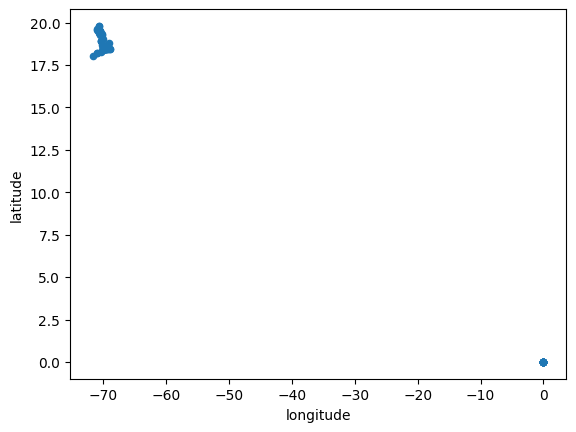

In [6]:
sez.plot(
    kind='scatter', x="longitude", y="latitude"
)


In [7]:
hoods.crs

<Geographic 2D CRS: GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WG ...>
Name: GCS_unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
sez_gdf = gpd.GeoDataFrame(
    sez, crs = hoods.crs,
    geometry = points_from_xy(
        sez["longitude"], sez["latitude"]
    )
)

In [9]:
sez_gdf.head(3)

,code,name,latitude,longitude,year,close,type,sez_id,origin,inv2000,...,tec2008,tec2019,tec2010,tec2011,tec2012,tec2013,tec2014,tec2015,tec2016,geometry
0,DOM-6NO,Zona Franca 6 de Noviembre,18.434236,-70.077097,2016.0,0.0,private,1.0,1.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2500.0,POINT (-70.07710 18.43424)
1,DOM-ALC,Los Alcarrizos,18.521192,-70.050865,1990.0,0.0,public,2.0,1.0,19853638.95,...,2969.16,4073.59,3389.04,3762.0,3197.77,3533.52,3852.34,4420.89,4293.0,POINT (-70.05087 18.52119)
2,DOM-ALT,Villa Altagracia,18.687048,-70.180632,1988.0,0.0,private,3.0,1.0,33900000.00,...,3026.84,4079.53,2903.04,5212.5,4772.18,4996.25,5007.53,5640.68,5610.0,POINT (-70.18063 18.68705)


In [10]:
sez_gdf.explore(
    titles = "CartoDB positron",
    cmap = "Set1", 
    style_kwds=dict(color = "black")
)

In [11]:
#%%timeit
joined = gpd.sjoin(
    sez_gdf,
    hoods,
    how="right",
    predicate="within"
)

In [12]:
#joined.fillna(0, inplace = True)

In [13]:
hoods.columns

Index(['id', 'shapeName', 'ntl_2000', 'ntl_2005', 'ntl_2010', 'ntl_2015',
       'ntl_2020', 'agr_2001', 'agr_2005', 'agr_2010', 'agr_2015', 'agr_2020',
       'urb_2001', 'urb_2005', 'urb_2010', 'urb_2015', 'urb_2020', 'sez_count',
       'pop_2000', 'pop_2005', 'pop_2010', 'pop_2015', 'pop_2020', 'tem_2001',
       'tem_2005', 'tem_2010', 'tem_2015', 'tem_2020', 'geometry'],
      dtype='object')

In [14]:
res = joined.groupby("shapeName").ent2015.mean().sort_values()

In [15]:
res

shapeName
CotuÃ­                   0.0
Mao                      0.0
San Antonio De Guerra    0.5
Barahona                 1.0
Hato Mayor               1.0
                        ... 
Villa Riva               NaN
Villa Tapia              NaN
Villa VÃ¡squez           NaN
Yaguate                  NaN
YamasÃ¡                  NaN
Name: ent2015, Length: 162, dtype: float64

In [16]:
res.info()

<class 'pandas.core.series.Series'>
Index: 162 entries, CotuÃ­ to YamasÃ¡
Series name: ent2015
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 6.6+ KB


In [17]:
hoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         162 non-null    object  
 1   shapeName  162 non-null    object  
 2   ntl_2000   162 non-null    float64 
 3   ntl_2005   162 non-null    float64 
 4   ntl_2010   162 non-null    float64 
 5   ntl_2015   162 non-null    float64 
 6   ntl_2020   162 non-null    float64 
 7   agr_2001   162 non-null    float64 
 8   agr_2005   162 non-null    float64 
 9   agr_2010   162 non-null    float64 
 10  agr_2015   162 non-null    float64 
 11  agr_2020   162 non-null    float64 
 12  urb_2001   162 non-null    float64 
 13  urb_2005   162 non-null    float64 
 14  urb_2010   162 non-null    float64 
 15  urb_2015   162 non-null    float64 
 16  urb_2020   162 non-null    float64 
 17  sez_count  162 non-null    float64 
 18  pop_2000   162 non-null    float64 
 19  pop_2005   162 non-nu

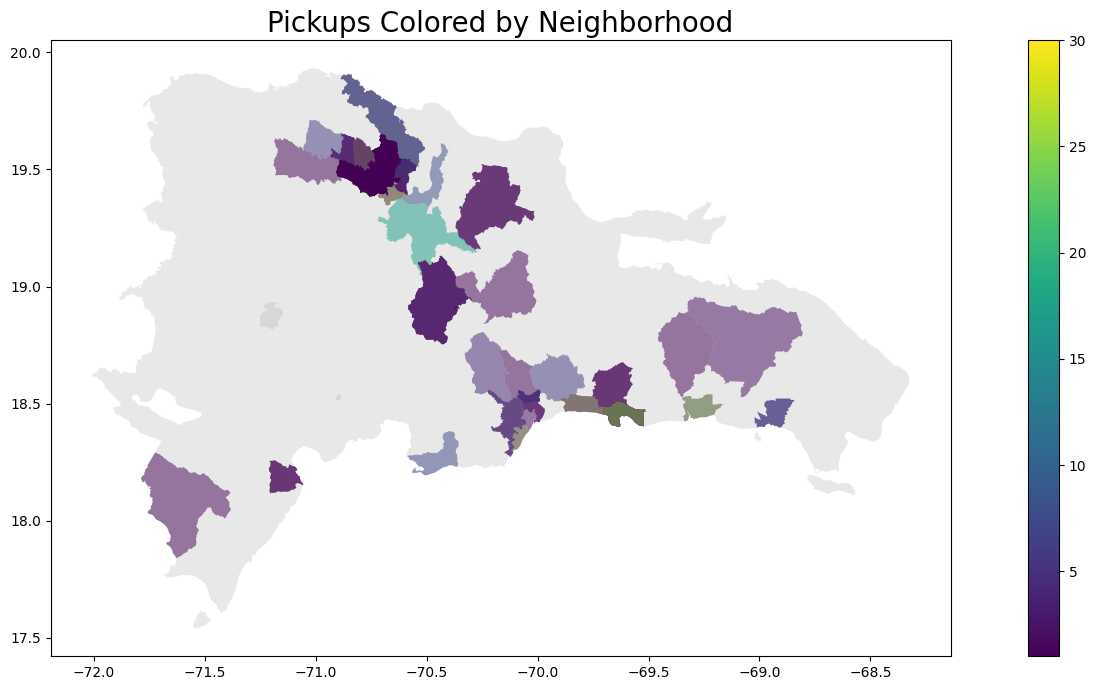

In [25]:
import matplotlib.pyplot as plt

cmap = LinearSegmentedColormap.from_list("custom_blue_red", ["blue", "red"])

fig, ax = plt.subplots(figsize=(20, 8))

joined.plot(ax=ax, color="lightgrey", alpha=0.5)
            
joined.plot(ax=ax, alpha=0.5, markersize=2, column="ent2015", 
            legend=True, vmin=1, vmax=30)
plt.title("Pickups Colored by Neighborhood", fontsize=20);
